# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Missing Data


**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai

---

# Handling Missing Data

- Visualising Missing Data
- Dealing with Missingness
- Types of Missingness
- Imputation Methods

## Visualising missing data

We will use the library missingno.

https://github.com/ResidentMario/missingno

Also see this blog:
https://datasciencechalktalk.wordpress.com/2019/09/02/handling-missing-values-with-missingo/

In [1]:
# You'll need to install missingno the first time you run this notebook
!pip install missingno

Make sure to restart the notebook kernel after installing `missingno` or the import will not work.

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

kaggle: [**Missing Migrants Project**](https://www.kaggle.com/snocco/missing-migrants-project).

In [3]:
df = pd.read_csv('data/MissingMigrants-Global-2019-12-31_correct.csv.zip', compression='zip')
df.shape

(5987, 20)

In [4]:
df.dtypes

Web ID                                   int64
Region of Incident                      object
Reported Date                           object
Reported Year                            int64
Reported Month                          object
Number Dead                            float64
Minimum Estimated Number of Missing    float64
Total Dead and Missing                   int64
Number of Survivors                    float64
Number of Females                      float64
Number of Males                        float64
Number of Children                     float64
Cause of Death                          object
Location Description                    object
Information Source                      object
Location Coordinates                    object
Migration Route                         object
URL                                     object
UNSD Geographical Grouping              object
Source Quality                           int64
dtype: object

In [5]:
df.head()

Web ID Region of Incident      Reported Date  Reported Year Reported Month  \
0   52673      Mediterranean  December 30, 2019           2019            Dec   
1   52666      Mediterranean  December 30, 2019           2019            Dec   
2   52663          East Asia  December 27, 2019           2019            Dec   
3   52662        Middle East  December 26, 2019           2019            Dec   
4   52661        Middle East  December 24, 2019           2019            Dec   

   Number Dead  Minimum Estimated Number of Missing  Total Dead and Missing  \
0          1.0                                  NaN                       1   
1          1.0                                  NaN                       1   
2          5.0                                  NaN                       5   
3          7.0                                  NaN                       7   
4         12.0                                  NaN                      12   

   Number of Survivors  Number of Females  Number of Males  \
0                 11.0                NaN              NaN   
1                  NaN                NaN              1.0   
2                  NaN                NaN              3.0   
3                 64.0                NaN              NaN   
4                  NaN                NaN              NaN   

   Number of Children     Cause of Death  \
0                 NaN        Hypothermia   
1                 NaN  Presumed drowning   
2                 NaN            Unknown   
3                 NaN           Drowning   
4                 NaN         Air strike   

                                Location Description  \
0     Unspecififed location off the coast of Algeria   
1              Recoverd on Calamorcarro Beach, Ceuta   
2  Bodies found on boat near Sado Island, Niigata...   
3            Van lake near Adilcevaz, Bitlis, Turkey   
4                     Al-Raqw market in Saada, Yemen   

                                  Information Source  \
0                                           El Watan   
1                                   El Foro de Ceuta   
2                       Japan Times, Kyodo News, AFP   
3                                  EFE, BBC, ARYnews   
4  UN Humanitarian Coordinator in Yemen, Qatar Tr...   

                Location Coordinates        Migration Route  \
0   35.568972356329, -1.289773129748  Western Mediterranean   
1   35.912383552874, -5.357673338898  Western Mediterranean   
2  38.154018233313, 138.086032653130                    NaN   
3   38.777228612085, 42.739257582031                    NaN   
4   17.245364805636, 43.239093360326                    NaN   

                                                 URL  \
0                             https://bit.ly/2FqQHo4   
1                             https://bit.ly/39yKRyF   
2  http://bit.ly/2sCnBz1, http://bit.ly/2sEra83, ...   
3  http://bit.ly/2ZG2Y19, http://bit.ly/2MLamDf, ...   
4  http://bit.ly/2FjolvD, http://bit.ly/2sD42GR, ...   

  UNSD Geographical Grouping  Source Quality  
0              Uncategorized               1  
1              Uncategorized               1  
2               Eastern Asia               3  
3               Western Asia               3  
4               Western Asia               4

In [8]:
print(f'Columns with at least one nan value: {df.isna().any(axis=0).sum()}')
print(f'Rows with at least one nan value: {df.isna().any(axis=1).sum()}')

Columns with at least one nan value: 12
Rows with at least one nan value: 5954


## missingno library
**Matrix**

The `msno.matrix` *nullity matrix* is a data-dense display which lets you quickly visually pick out patterns in data completion.

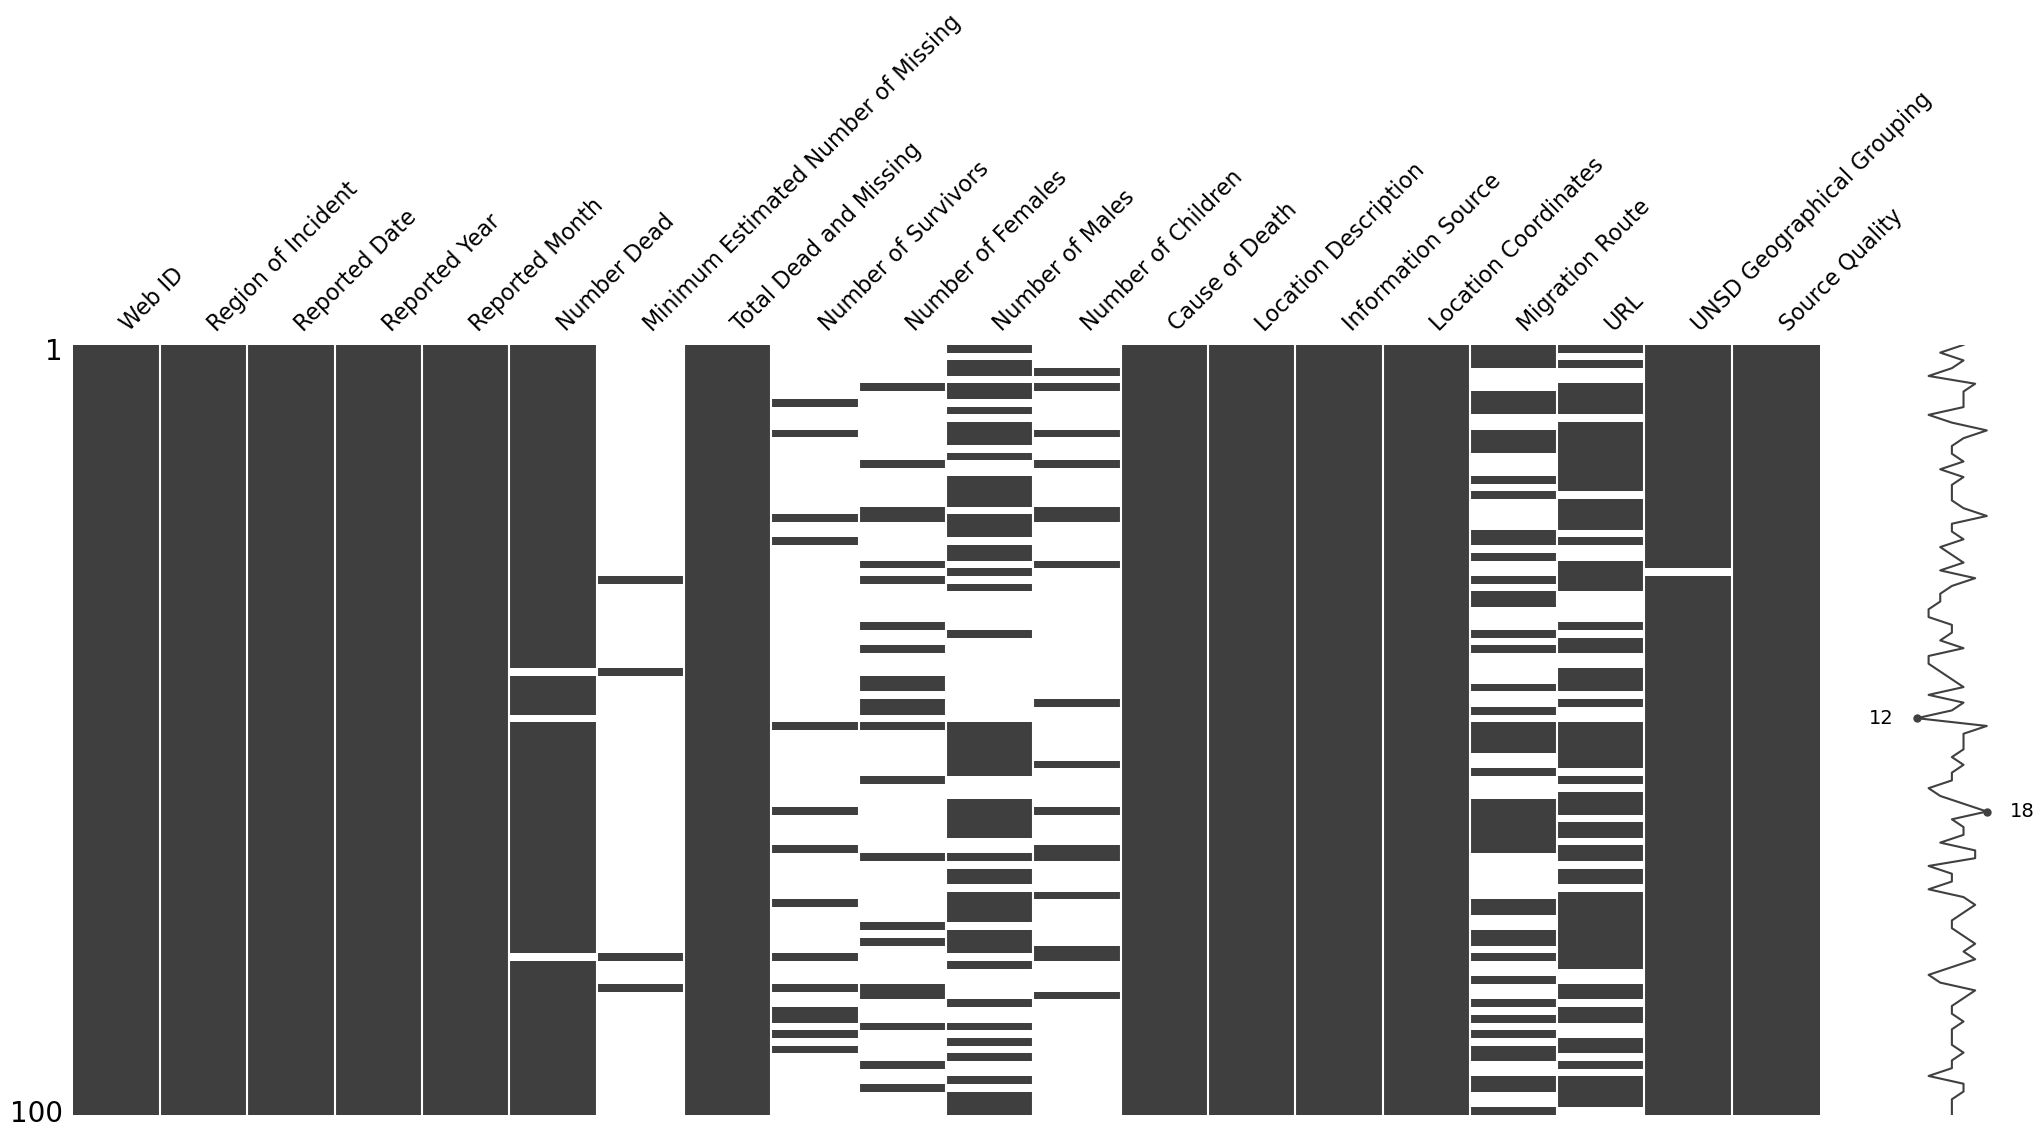

In [9]:
msno.matrix(df.sample(100));

The sparkline on the right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.


**Bar**  

`msno.bar` is a simple visualization of nullity by column:

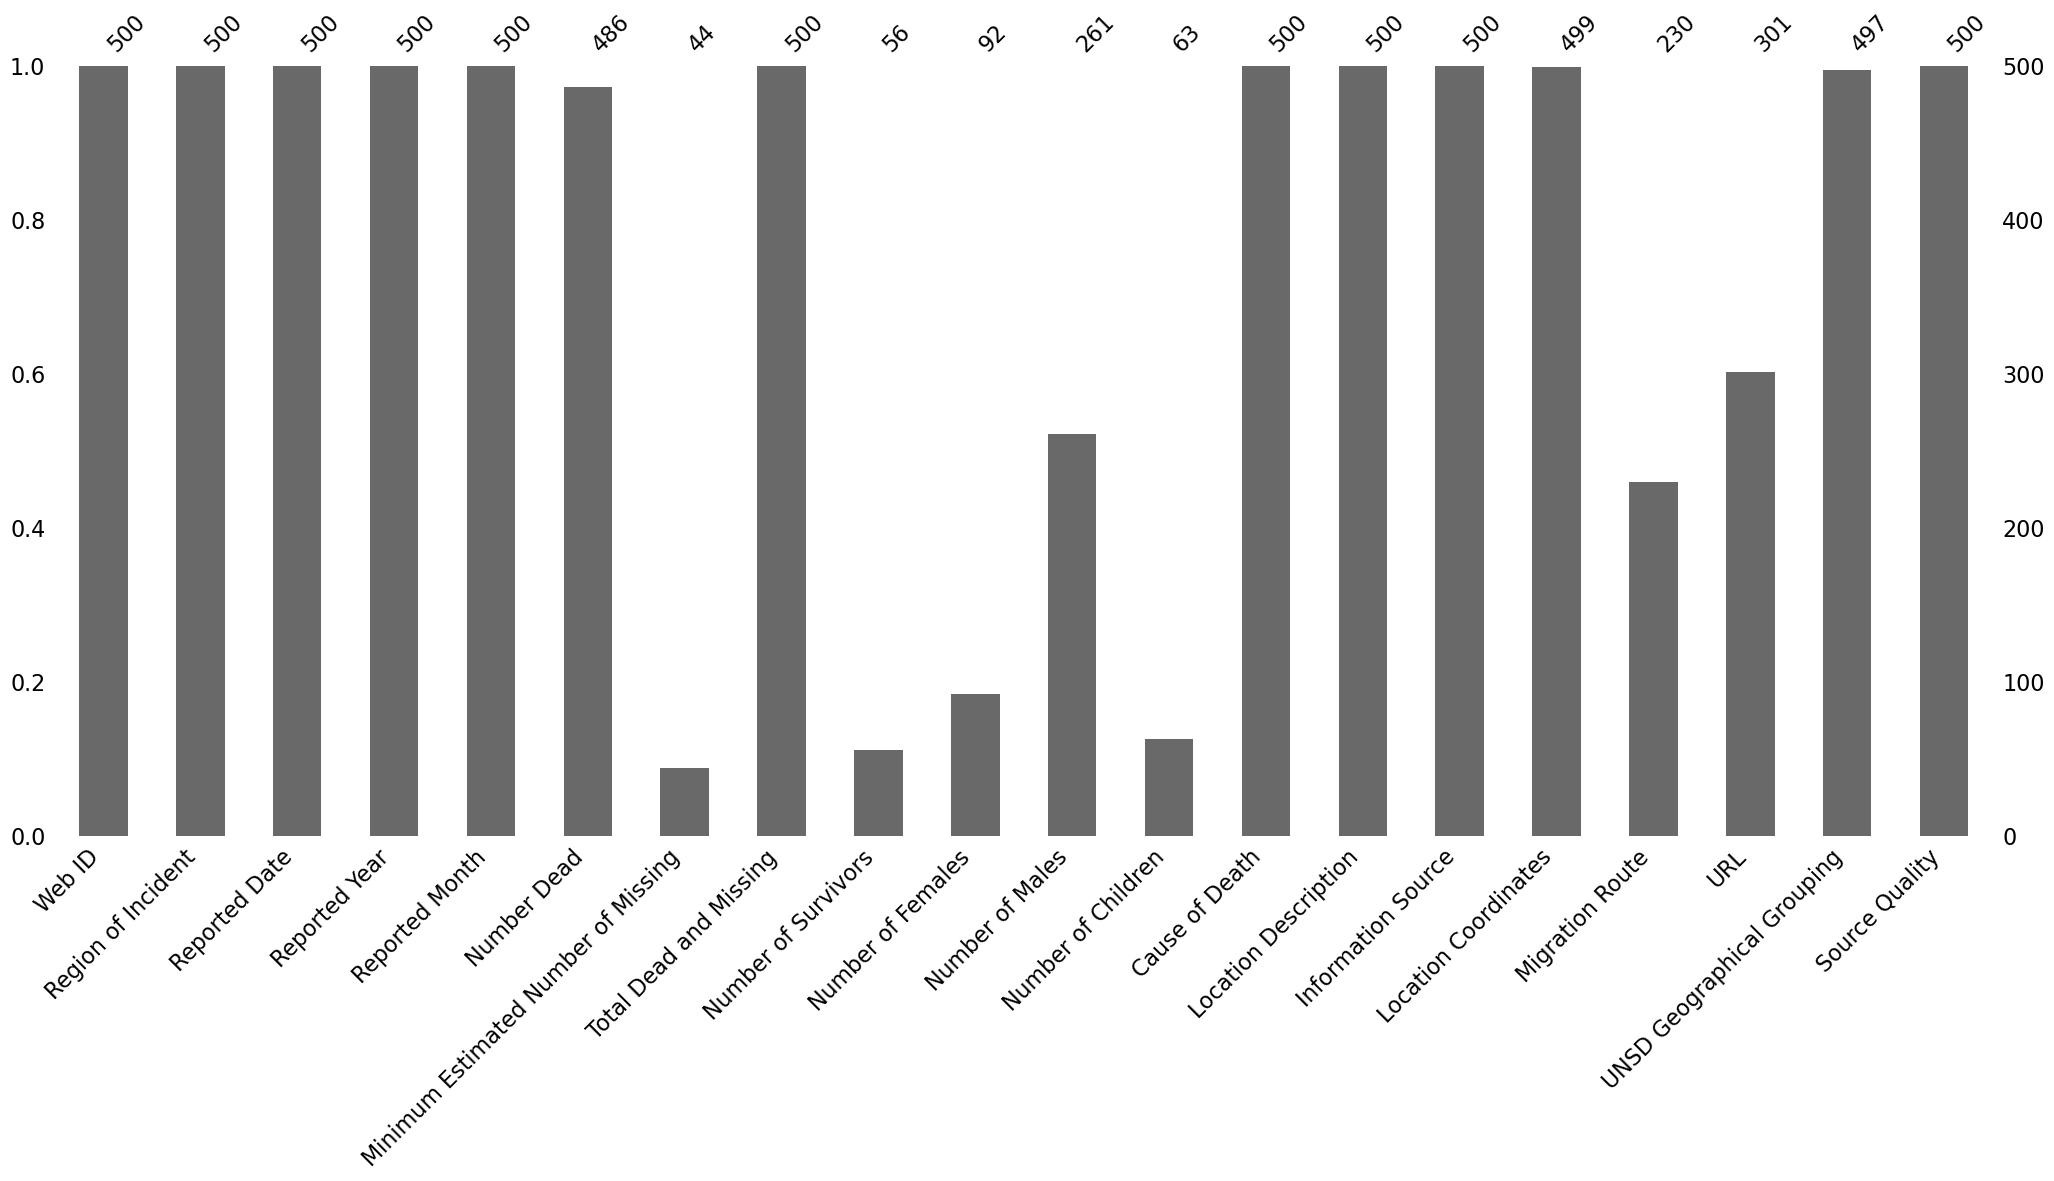

In [10]:
msno.bar(df.sample(500));

**Heatmap**

The `missingno correlation heatmap` measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

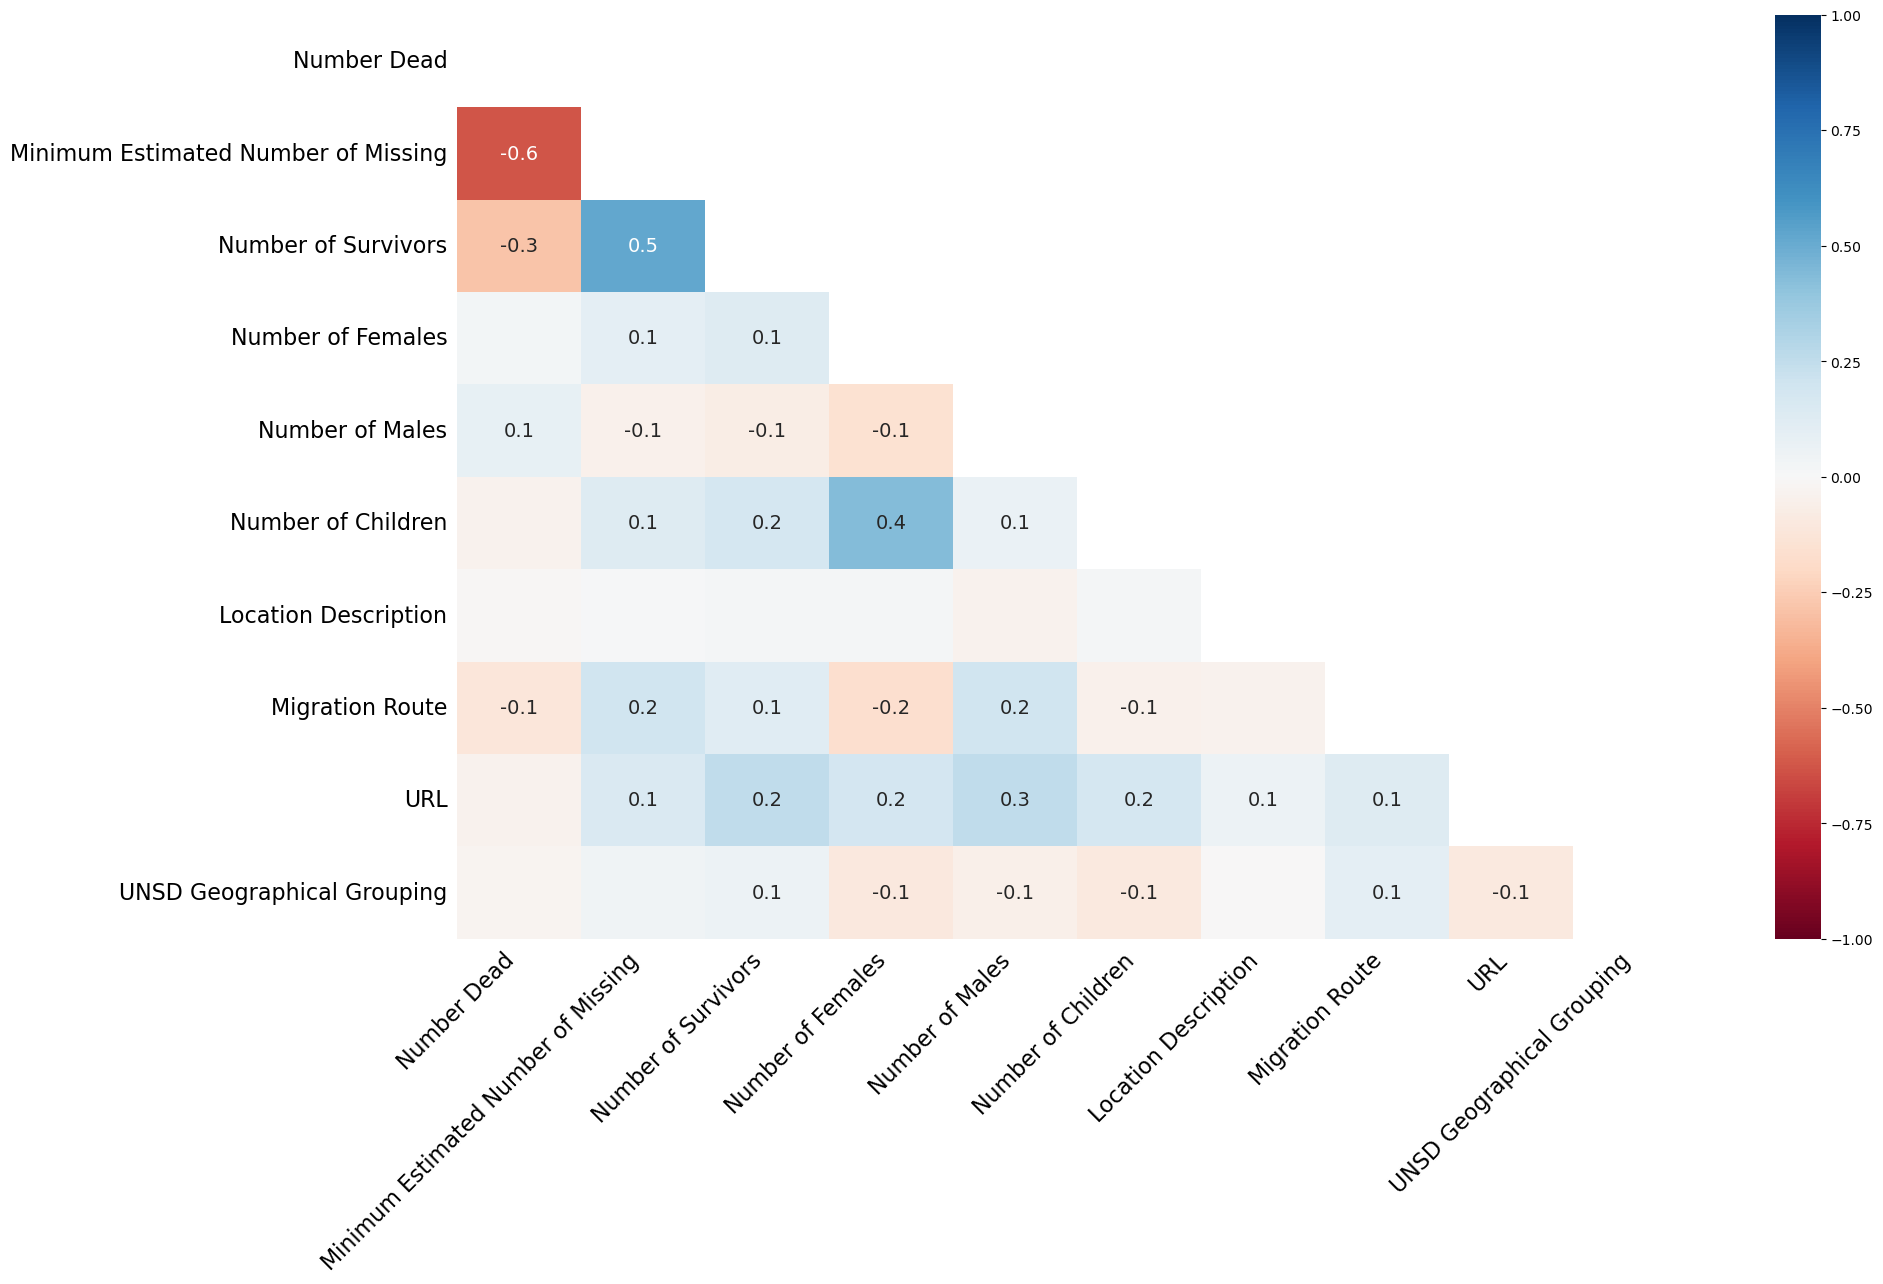

In [11]:
msno.heatmap(df.sample(500));

*Minimum Estimated Number of Missing* is negative correlated to *Number of Dead* (-.6) and that means that usually when one feature is not null the other is null and vice versa. *Minimum Estimated Number of Missing* is positive correlated to *Number of Survivors* (.4) and that means that usually when one feature is null the other is also null.

**Dendrogram**  

The `dendrogram` allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presenceâ€”one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

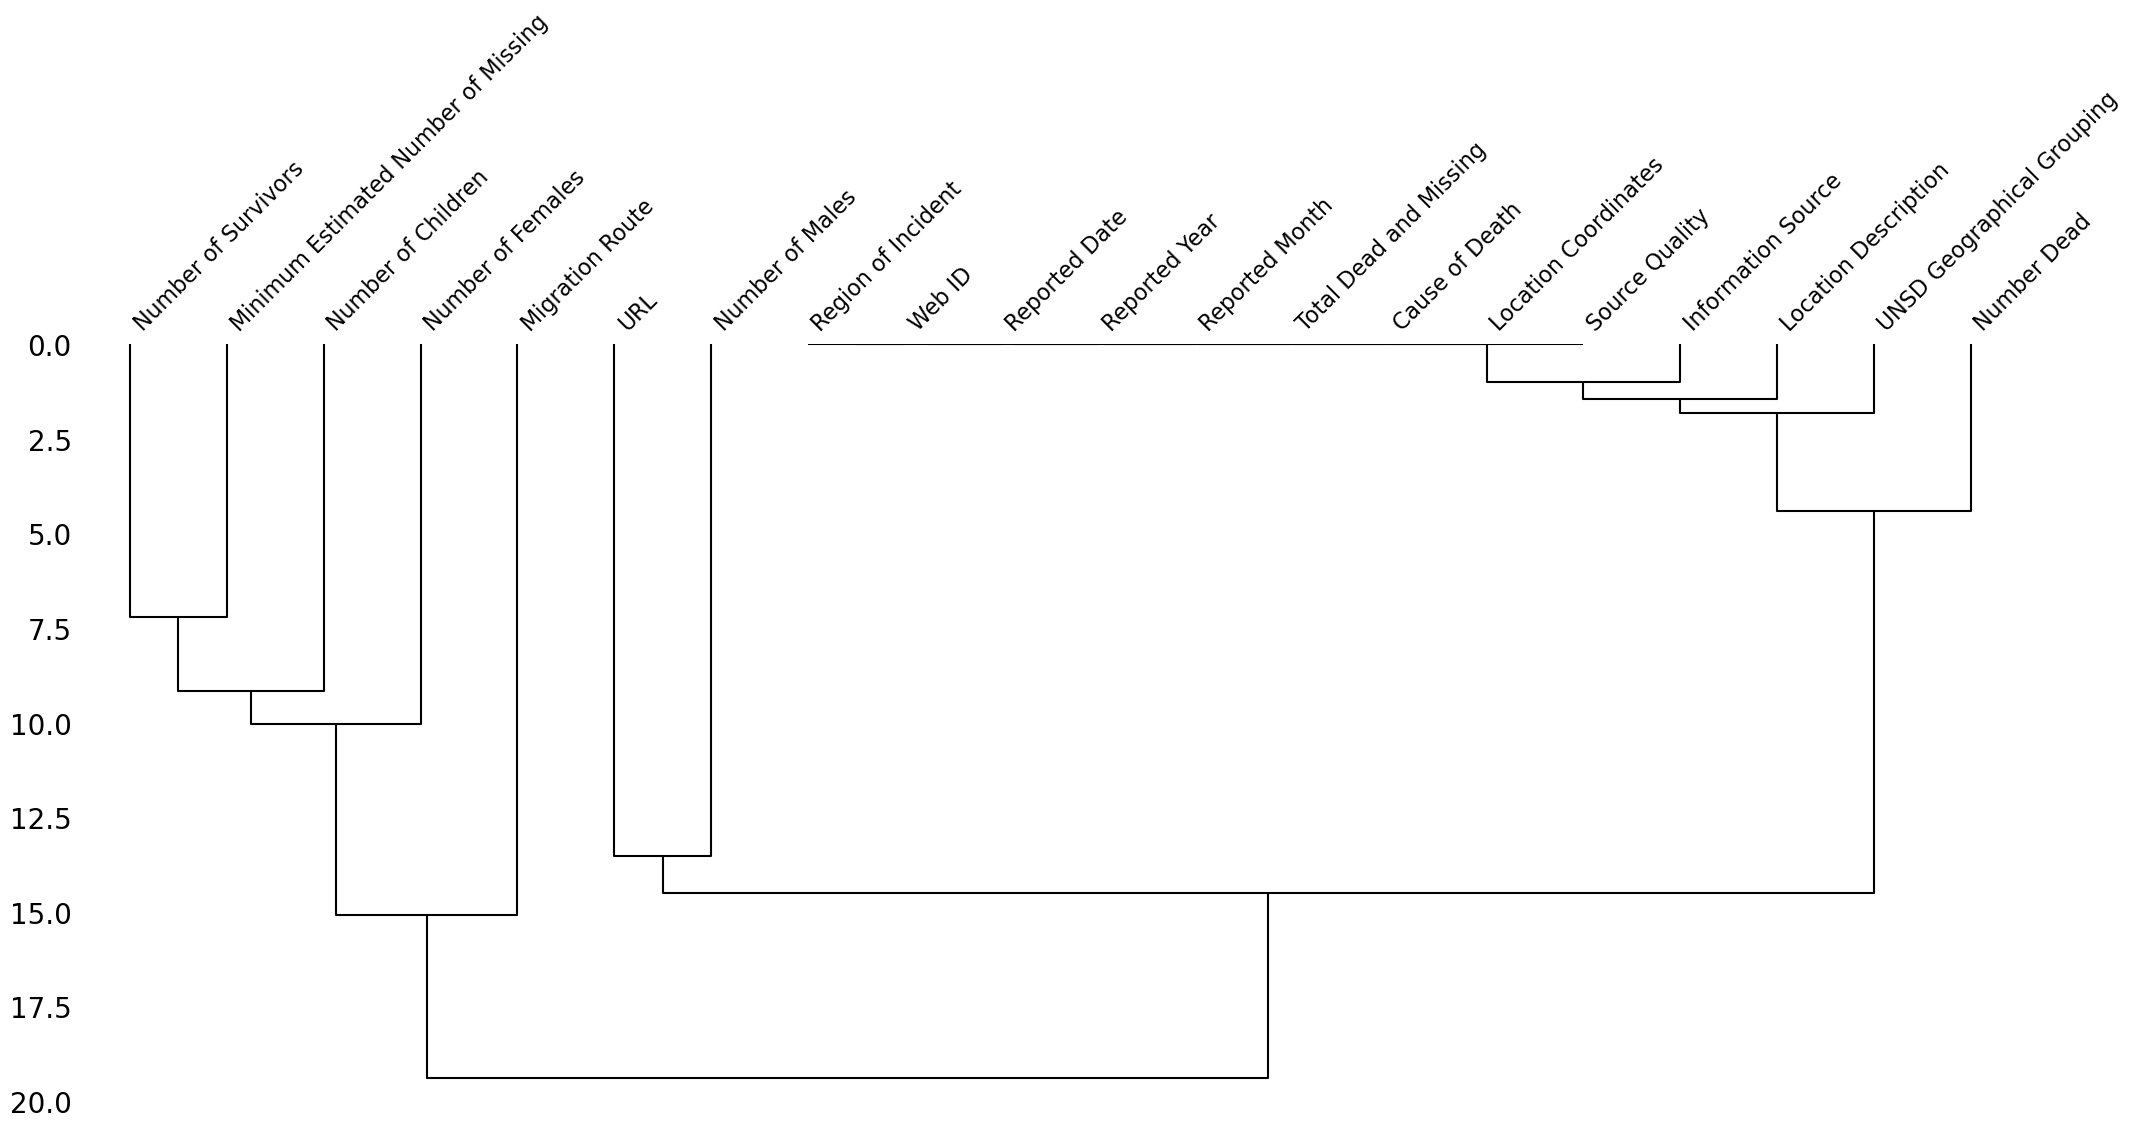

In [12]:
msno.dendrogram(df.sample(500));

So, just a few lines of missingno can work great to see what data is missing and some relations of missing data. But we can use other tools like pandas or seaborn to visualize it.

**NaN bars with seaborn**

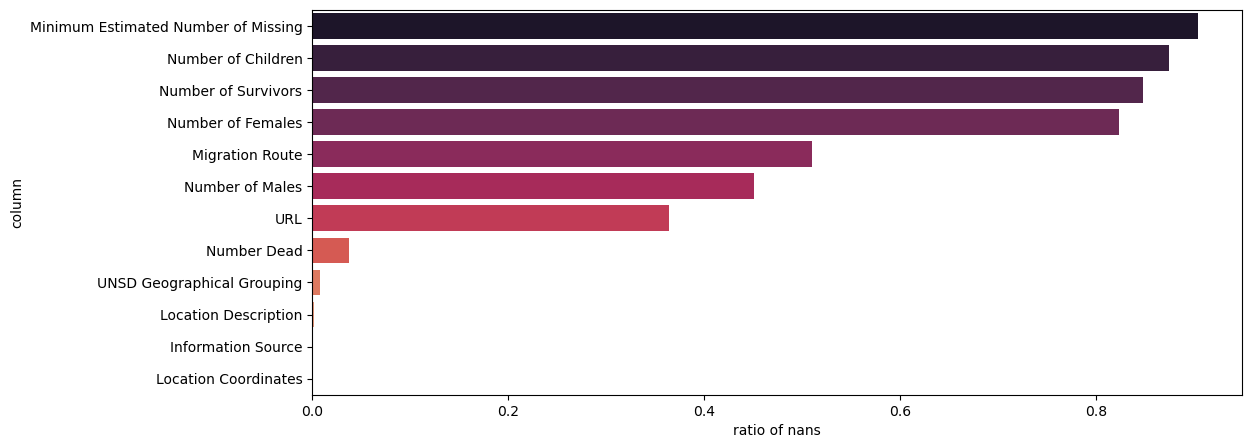

In [19]:
g = df[df.columns[df.isna().any(axis=0)]].isna().sum().sort_values(ascending=False) / df.shape[0]
g = g.reset_index().rename(columns={'index': 'column', 0: 'nans'})
sns.barplot(x='nans', y='column', data=g, hue='column', ax=plt.subplots(1,1,figsize=(12,5))[1], palette='rocket', legend=False)
plt.xlabel('ratio of nans');

**NaN heatmap with seaborn**

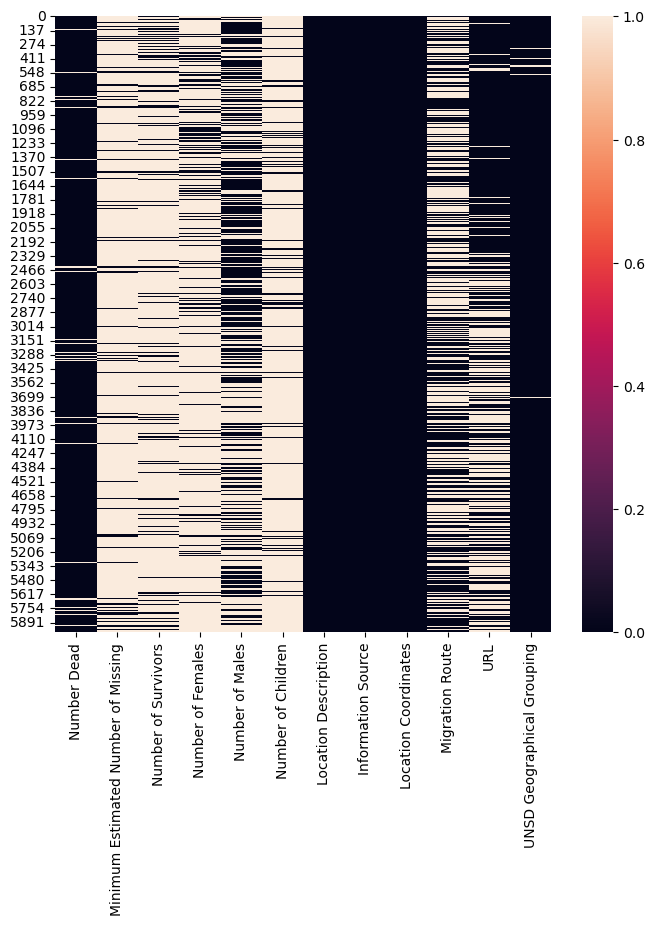

In [21]:
sns.heatmap(df[df.columns[df.isna().any(axis=0)]].isna().astype(int), ax=plt.subplots(1,1,figsize=(8,8))[1]);

**nullity matrix using matplotlib**

Number Dead                             : 3.76%
Minimum Estimated Number of Missing     : 90.38%
Number of Survivors                     : 84.73%
Number of Females                       : 82.33%
Number of Males                         : 45.11%
Number of Children                      : 87.42%
Location Description                    : 0.17%
Information Source                      : 0.03%
Location Coordinates                    : 0.02%
Migration Route                         : 51.04%
URL                                     : 36.36%
UNSD Geographical Grouping              : 0.77%


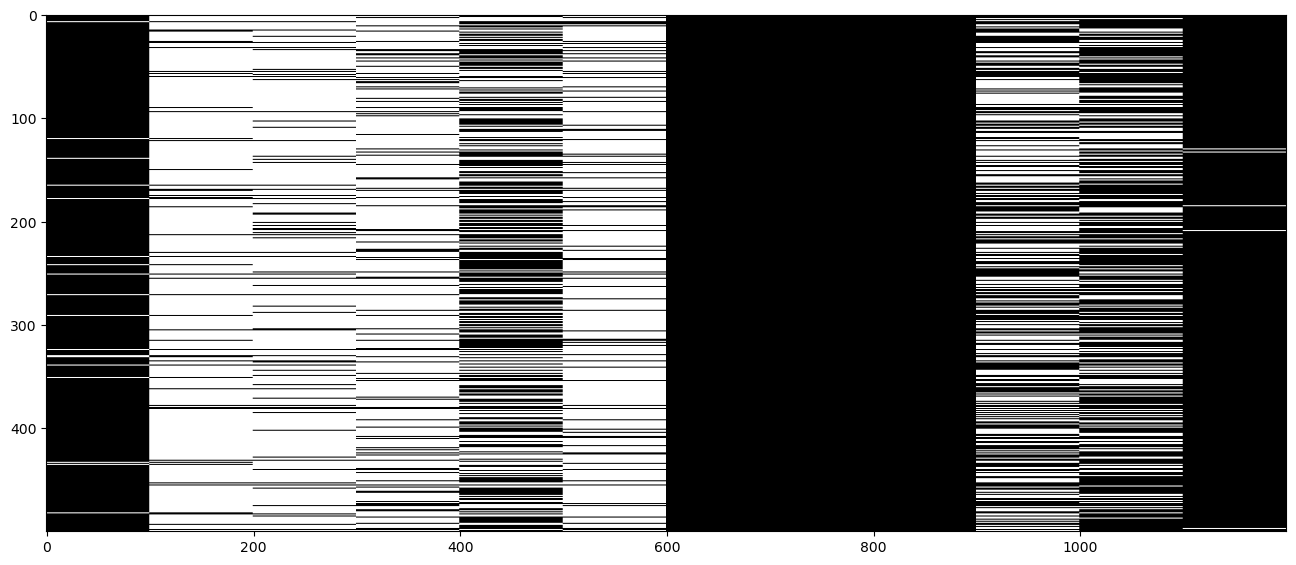

In [23]:
plt.figure(figsize=(16,10))

# we will plot only columns where there is at least one nan value
nan_columns = df.columns[df.isna().any(axis=0)]
# save the number of nan values per column
count_nans = df[nan_columns].isna().sum()

values = df[nan_columns].sample(500).isna().astype(int).values

column_width = 100
columns = None

for i in range(values.shape[1]):
    name = nan_columns[i]    
    print(f'{name:40}: {count_nans[name]/df.shape[0]:.2%}')
    
    column = values[:, i]
    column = np.array([column for _ in range(column_width)]).T
    
    columns = column if columns is None else np.hstack([columns, column])
    
plt.imshow(columns, cmap='gray');

## What are the simplest ways to handle missing data?

### Naively handling missingness!

- Drop the observations that have any missing values.
  - Use ```pd.DataFrame.dropna(axis=0)```
- Impute the mean/median (if quantitative) or most common class (if categorical) for all missing values.
  - Use ```pd.DataFrame.fillna(value=x.mean())```

#### How do statsmodels and sklearn handle these NaNs? 

#### What are some consequences in handling missingness in these fashions?

**To face these questions we will work on a very simple dataset with missing data.**

**Let's write some helper methods**

In [24]:
# sample data with nans
def get_data():
    return pd.DataFrame(
        data={
            'A': [1, 2, 3, np.nan, np.nan, 6],
            'B': [1, -1, 1, -1, 1, np.nan],
            'C': [1, 2, np.nan, 8, 16, 32],
            'D': ['male', 'female', 'male', 'female', None, 'male'],            
            'E': ['red', 'blue', 'red', 'green', None, 'yellow'],}
        
    )

df = get_data()
df

A    B     C       D       E
0  1.0  1.0   1.0    male     red
1  2.0 -1.0   2.0  female    blue
2  3.0  1.0   NaN    male     red
3  NaN -1.0   8.0  female   green
4  NaN  1.0  16.0    None    None
5  6.0  NaN  32.0    male  yellow

In [25]:
# used to plot original series with a new one where we already handled missing data
def plot_compare(df, column, title=''):
    
    org_df = get_data()
    nans = org_df.index[org_df[column].isna()]

    fig, axes = plt.subplots(1, 2, figsize=(16,2))

    org_df[[column]].plot(marker='o', ms=10, lw=0, ax=axes[0])
    if len(nans) > 0:
        for x in nans:
            axes[0].axvline(x=x, lw=1, ls='dashed', label=f'NaN: {x}')
    axes[0].set_title('original series')
    
    df[[column]].plot(marker='o', ms=10, lw=0, ax = axes[1])
    if len(nans) > 0:
        df.loc[df.index.isin(nans), column].plot(marker='o', ms=10, lw=0, color='orange', ax = axes[1])
        for x in nans:
            axes[1].axvline(x=x, lw=1, ls='dashed', label=f'NaN: {x}')    
    if len(title) > 0:
        title = f'new series ({title})'
    else:
        title = 'new series'
    axes[1].set_title(title)
    
    plt.suptitle(f'column {column}')
    plt.show()

### Method: dropna()

In [26]:
df = get_data()
df = df.dropna(axis=0)
df

A    B    C       D     E
0  1.0  1.0  1.0    male   red
1  2.0 -1.0  2.0  female  blue

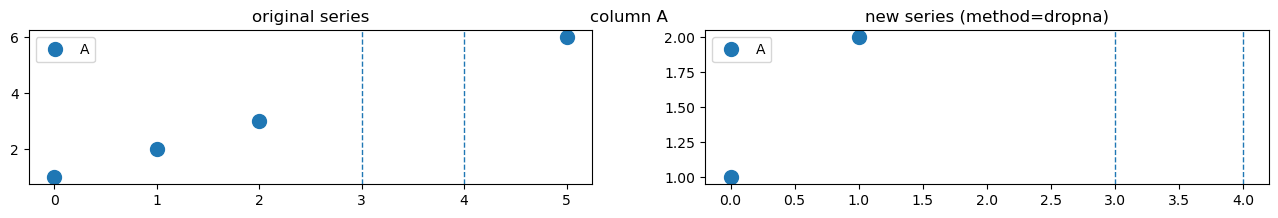

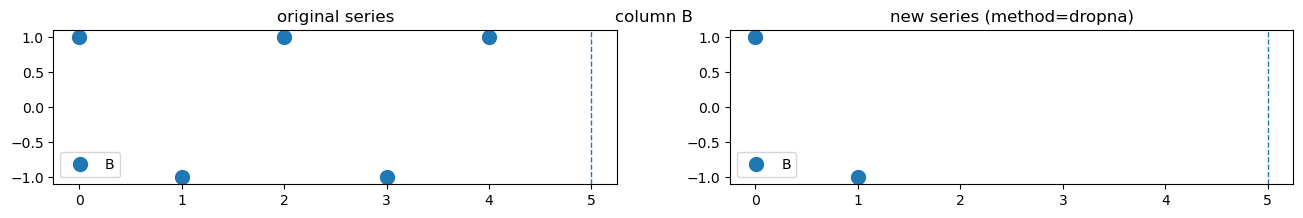

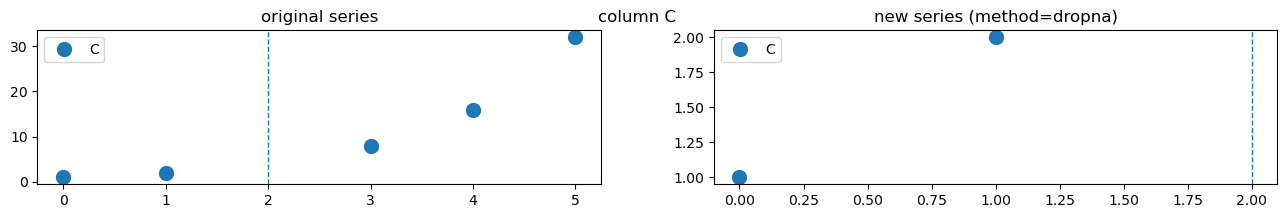

In [27]:
plot_compare(df, 'A', 'method=dropna')
plot_compare(df, 'B', 'method=dropna')
plot_compare(df, 'C', 'method=dropna')

It looks like dropping was not a good idea here. From 6 samples we've obtained just two. We've lost samples at index 3 and 5 for feature 'A' and samples at index 3 and 4 for feature 'B'.

### Method: fillna with mean

In [28]:
df = get_data()
for c in df.select_dtypes('number'):
    df[c] = df[c].fillna(df[c].mean())
df

A    B     C       D       E
0  1.0  1.0   1.0    male     red
1  2.0 -1.0   2.0  female    blue
2  3.0  1.0  11.8    male     red
3  3.0 -1.0   8.0  female   green
4  3.0  1.0  16.0    None    None
5  6.0  0.2  32.0    male  yellow

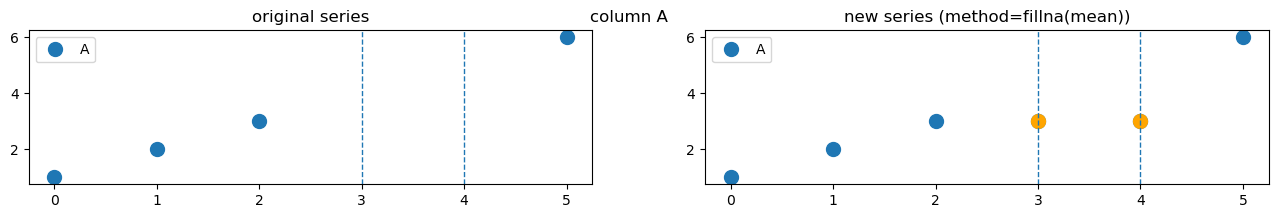

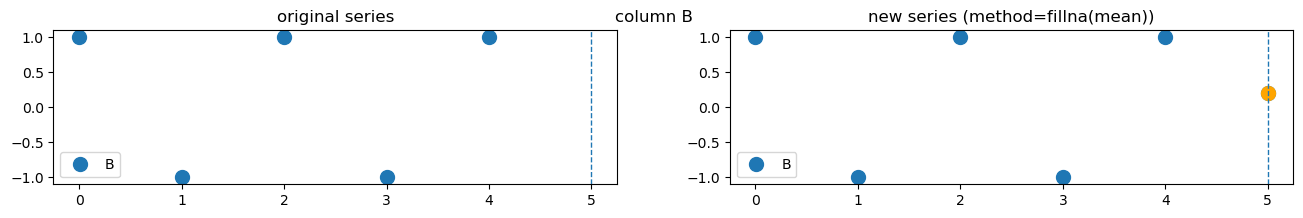

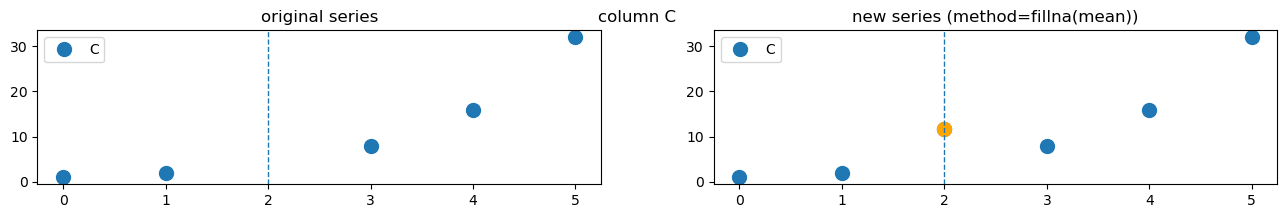

In [29]:
plot_compare(df, 'A', 'method=fillna(mean)')
plot_compare(df, 'B', 'method=fillna(mean)')
plot_compare(df, 'C', 'method=fillna(mean)')

### Method: fillna with median

In [30]:
df = get_data()
for c in df.select_dtypes('number'):
    df[c] = df[c].fillna(df[c].median())
df

A    B     C       D       E
0  1.0  1.0   1.0    male     red
1  2.0 -1.0   2.0  female    blue
2  3.0  1.0   8.0    male     red
3  2.5 -1.0   8.0  female   green
4  2.5  1.0  16.0    None    None
5  6.0  1.0  32.0    male  yellow

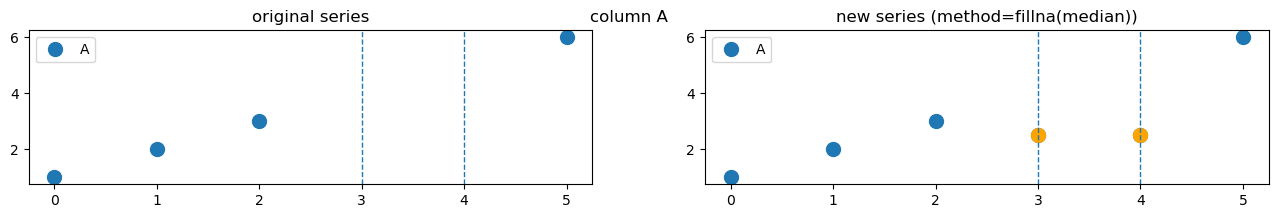

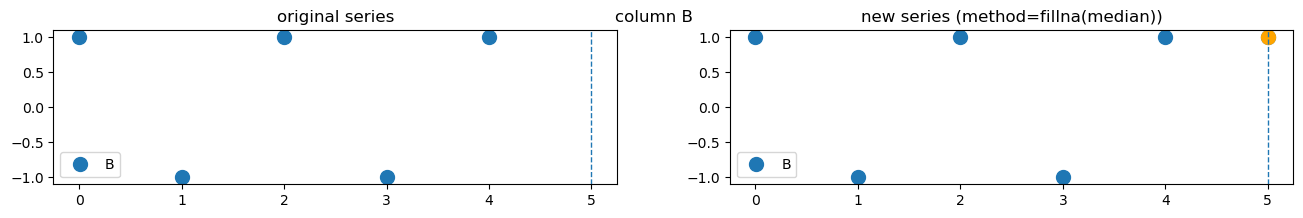

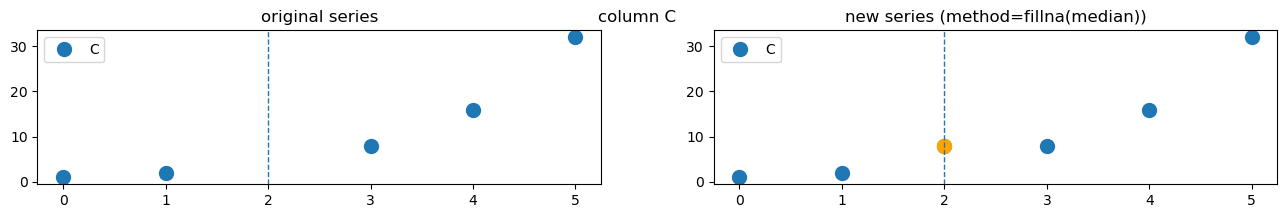

In [31]:
plot_compare(df, 'A', 'method=fillna(median)')
plot_compare(df, 'B', 'method=fillna(median)')
plot_compare(df, 'C', 'method=fillna(median)')

### Forward and backward filling methods

In [32]:
df = get_data()
nans = df.isna()

# helper to highligh original NaN cells
def highlight_nans(s):
    return np.where(nans[s.name], 'color:white;background-color:black;text-align:center', '')

df.style.format(formatter=None, na_rep='').apply(highlight_nans, axis=0)

### Method: bfill / pad

In [34]:
df_ffill = df.ffill()
df_ffill.style.apply(highlight_nans, axis=0)

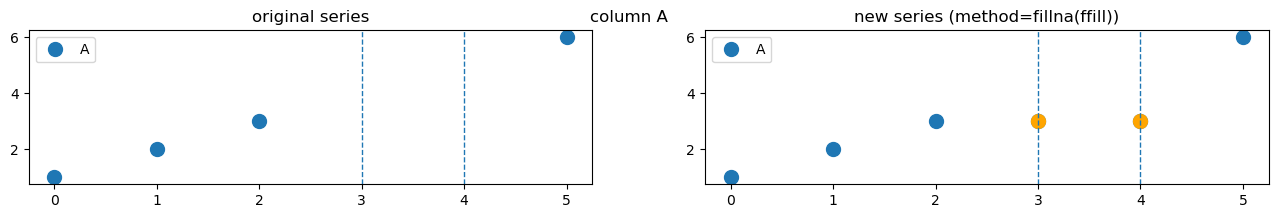

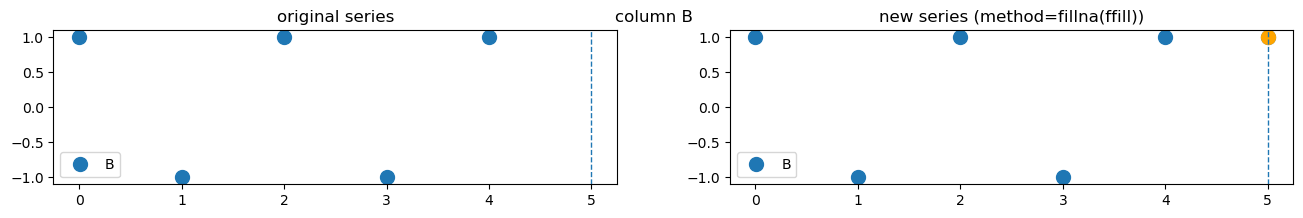

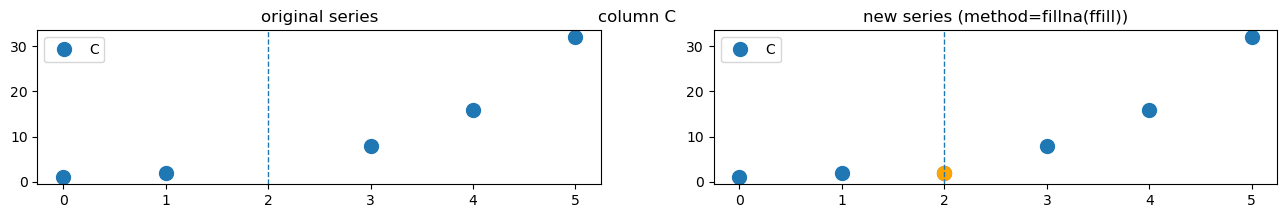

In [35]:
plot_compare(df_ffill, 'A', 'method=fillna(ffill)')
plot_compare(df_ffill, 'B', 'method=fillna(ffill)')
plot_compare(df_ffill, 'C', 'method=fillna(ffill)')

### Method: bfill / backfill

In [37]:
df_ffill = df.bfill()
df_bfill.style.apply(highlight_nans, axis=0)

Sometimes these imputation techniques are not enough to fill missing data by definition. How do you fill missing data with future data when there is no future data? Take a look at column B of the above table.

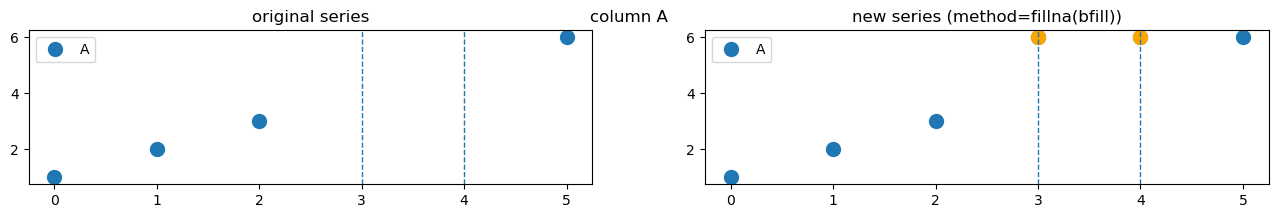

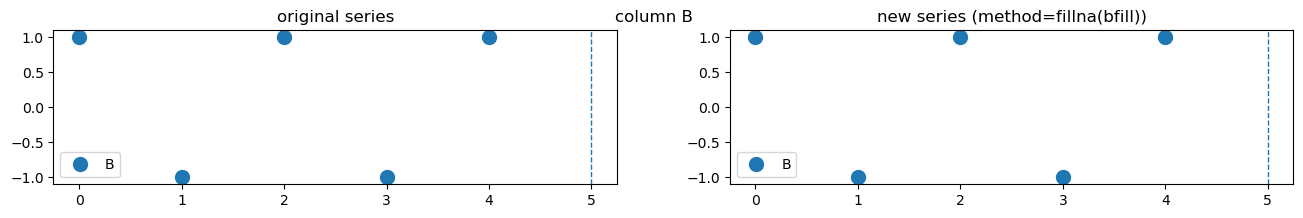

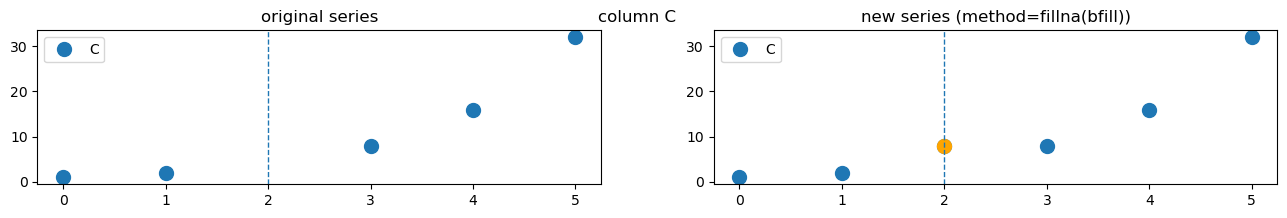

In [38]:
plot_compare(df_bfill, 'A', 'method=fillna(bfill)')
plot_compare(df_bfill, 'B', 'method=fillna(bfill)')
plot_compare(df_bfill, 'C', 'method=fillna(bfill)')

### Imputation using the most frequent value

For numerical values sometime using the mean or the median value might make sense but what about categorial variables? Pandas is great when counting for us.

In [39]:
df[['D', 'E']].describe()

D    E
count      5    5
unique     2    4
top     male  red
freq       3    2

The mode of a set of values is the value that appears most often. It can be multiple values.

`mode()`: Get the mode(s) of each element along the selected axis.

```python
DataFrame.mode(axis=0, numeric_only=False, dropna=True)
```

In [40]:
most_frequent = df[['D', 'E']].mode().head(1)
most_frequent

D    E
0  male  red

Transform dataframe's first row into a dictionary to be used with `fillna()`

In [41]:
most_frequent = {c: most_frequent[c].item() for c in most_frequent.columns}
most_frequent

{'D': 'male', 'E': 'red'}

In [42]:
df.fillna(most_frequent).style.apply(highlight_nans, axis=0)

## Imputation through interpolation

Pandas offers the [interpolate]((https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)) method that can be used for imputation. It's powerfull comes from making use of the `scipy.interpolate` method.

```pd.DataFrame.interpolate()```: *Fill NaN values using an interpolation method*

### Forward padding

In [44]:
df.ffill(limit=1).style.apply(highlight_nans, axis=0)

The limit parameter value affects the number of consecutive NaN values we can fill with this method. There is another parameter named `limit_direction` that can be use to make it work forward, backward or both direction depending on the selected method. 

In [46]:
df.bfill(limit=2).style.apply(highlight_nans, axis=0)

### Linear interpolation

- TIP 1: This is the only method that doesn't make use of the index to do the interpolation.
- TIP 2: It is really worth it to read the interpolate documentation.

In [48]:
df = df.infer_objects(copy=False)
df_numeric = df.select_dtypes(include='number').interpolate(method='linear')
df_non_numeric = df.select_dtypes(exclude='number')
df_interpolated = pd.concat([df_numeric, df_non_numeric], axis=1)
df_interpolated.style.apply(highlight_nans, axis=0)


### Quadratic interpolation

In [51]:
df = df.infer_objects(copy=False)
df_numeric = df.select_dtypes(include='number').interpolate(method='quadratic')
df_non_numeric = df.select_dtypes(exclude='number')
df_interpolated = pd.concat([df_numeric, df_non_numeric], axis=1)
df_interpolated.style.apply(highlight_nans, axis=0)

Take a look at the NaN at column B. The reason is we are doing ... interpolation.  
Remember that when using interpolation for imputation there still could exist NaN values.

### Quadratic interpolation with a different index

In [52]:
df.set_index(np.square(df.index)).interpolate(method='quadratic').style.apply(highlight_nans, axis=0)

/var/folders/lr/pwk4bd7d37zchw5p88vwksrc0000gn/T/ipykernel_15681/4283052780.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.set_index(np.square(df.index)).interpolate(method='quadratic').style.apply(highlight_nans, axis=0)


### Polynomial interpolation of order 3

In [53]:
df.interpolate(method='polynomial', order=3).style.apply(highlight_nans, axis=0)

/var/folders/lr/pwk4bd7d37zchw5p88vwksrc0000gn/T/ipykernel_15681/4084771218.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='polynomial', order=3).style.apply(highlight_nans, axis=0)


### Polynomial interpolation of order 3 with a different index

In [54]:
df.set_index(np.square(df.index)).interpolate(method='polynomial', order=3).style.apply(highlight_nans, axis=0)

/var/folders/lr/pwk4bd7d37zchw5p88vwksrc0000gn/T/ipykernel_15681/2518775652.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.set_index(np.square(df.index)).interpolate(method='polynomial', order=3).style.apply(highlight_nans, axis=0)


Take a look at the column A. The index really affects the results.

### Interpolation using nearest
We can use the method `nearest` that will make use of the index to do its work.  
**TIP**: if you think that there is a feature (column) that is related to the feature with missing values, you can make use of the feature as index to look for the nearest neighbor's value.

We are going to split an example procedure into different steps, but you can add these into a recursive method once you understand what's going on.

In [55]:
# reset_index will free the index as a column that will help later
temp = df.reset_index()
# we need B without nans to work as index for interpolation
temp = temp.loc[df.B.notna(), ['index', 'B', 'D']]
temp = temp.set_index('B')
temp

index       D
B                  
 1.0      0    male
-1.0      1  female
 1.0      2    male
-1.0      3  female
 1.0      4    None

In [56]:
# use this dictionary to create a one hot encoding version of column D
male_ohe = {'male': 1, 'female': 0, None: None}
temp['is_male'] = temp['D'].apply(lambda x: male_ohe[x]).astype(float)
temp

index       D  is_male
B                           
 1.0      0    male      1.0
-1.0      1  female      0.0
 1.0      2    male      1.0
-1.0      3  female      0.0
 1.0      4    None      NaN

In [57]:
temp = temp.interpolate(method='nearest')
temp

/var/folders/lr/pwk4bd7d37zchw5p88vwksrc0000gn/T/ipykernel_15681/1753854434.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp = temp.interpolate(method='nearest')


index       D  is_male
B                           
 1.0      0    male      1.0
-1.0      1  female      0.0
 1.0      2    male      1.0
-1.0      3  female      0.0
 1.0      4    None      1.0

In [58]:
# we reverse the one hot encoded at is_male column to fill column D
male_ohe_r = {v:k for k,v in male_ohe.items()}
temp['D'] = temp['is_male'].apply(lambda x: male_ohe_r[x])
temp

index       D  is_male
B                           
 1.0      0    male      1.0
-1.0      1  female      0.0
 1.0      2    male      1.0
-1.0      3  female      0.0
 1.0      4    male      1.0

In [59]:
# recover original index to be used to return values to df
temp = temp.set_index('index')  #df = df.reset_index().set_index('age')

In [60]:
temp

D  is_male
index                 
0        male      1.0
1      female      0.0
2        male      1.0
3      female      0.0
4        male      1.0

In [61]:
df.loc[df.index.isin(temp.index), 'D'] = temp.D
df

A    B     C       D       E
0  1.0  1.0   1.0    male     red
1  2.0 -1.0   2.0  female    blue
2  3.0  1.0   NaN    male     red
3  NaN -1.0   8.0  female   green
4  NaN  1.0  16.0    male    None
5  6.0  NaN  32.0    male  yellow

### We fixed column 'D', now let's fix column 'B'

We will use column D to fix column B, since, as we saw, they are related.

In [62]:
# reset_index will free the index as a column that will help later
temp = df.reset_index()
# we need D without nans to work as index for interpolation 
temp = temp.loc[df.D.notna(), ['index', 'B', 'D']]
temp = temp.set_index('D')
temp

index    B
D                 
male        0  1.0
female      1 -1.0
male        2  1.0
female      3 -1.0
male        4  1.0
male        5  NaN

In [63]:
temp.reset_index(inplace=True)
temp

D  index    B
0    male      0  1.0
1  female      1 -1.0
2    male      2  1.0
3  female      3 -1.0
4    male      4  1.0
5    male      5  NaN

In [64]:
# use the relationship between D and B to recreate B. 
male_ohe = {'male': 1, 'female': -1, None: None}
temp['B'] = temp['D'].apply(lambda x: male_ohe[x]).astype(float)
temp

D  index    B
0    male      0  1.0
1  female      1 -1.0
2    male      2  1.0
3  female      3 -1.0
4    male      4  1.0
5    male      5  1.0

In [65]:
df.loc[df.index.isin(temp.index), 'B'] = temp.B
df

A    B     C       D       E
0  1.0  1.0   1.0    male     red
1  2.0 -1.0   2.0  female    blue
2  3.0  1.0   NaN    male     red
3  NaN -1.0   8.0  female   green
4  NaN  1.0  16.0    male    None
5  6.0  1.0  32.0    male  yellow

### We can select the best method for every feature

In [66]:
temp.head()

D  index    B
0    male      0  1.0
1  female      1 -1.0
2    male      2  1.0
3  female      3 -1.0
4    male      4  1.0

In [67]:
df = df.assign(
        A=df['A'].interpolate(method='linear'),
        B=df['B'],
        C=df['C'].interpolate(method='quadratic'),
        D=df['D']
    )

df.style.apply(highlight_nans, axis=0)

### It's pending to fill missing data at column E

Computers and algorithms can do a lot for us, but remember that we can do a lot for them. We observe that column E denotes colors. We know that categorical variables can be converted into numerical variables using One Hot Encoding. But in particular this kind of categorical variables can be converted into a better representation of numerical variables. There are many ways to represent colors as numbers but for instance we will try RGB format.

In [68]:
from matplotlib.patches import Rectangle

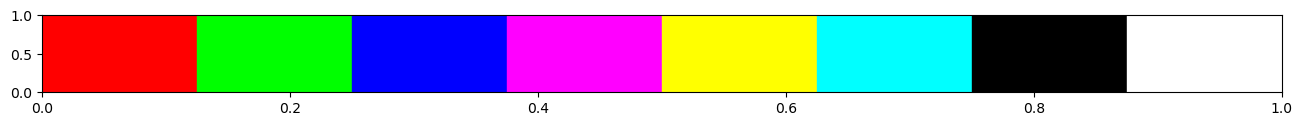

In [69]:
plt.figure(figsize=(16, 1))
ax = plt.subplot(111)
colors = {
    'red':     (1,0,0),
    'green':   (0,1,0),
    'blue':    (0,0,1),
    'magenta': (1,0,1),
    'yellow':  (1,1,0),
    'cyan':    (0,1,1),
    'black':   (0,0,0),
    'white':   (1,1,1),
}

col, row = 0., 0.
for name, c in colors.items():
    ax.add_patch(Rectangle((col, row), 1, 1, color=c))
    col += 1/len(colors)
plt.show()

In [70]:
def rgb_part(x, rgb_index):
    global colors
    if x == None: return None
    c = colors[x]
    return c[rgb_index]

df['E_r'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=0))
df['E_g'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=1))
df['E_b'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=2))
df

A    B          C       D       E  E_r  E_g  E_b
0  1.0  1.0   1.000000    male     red  1.0  0.0  0.0
1  2.0 -1.0   2.000000  female    blue  0.0  0.0  1.0
2  3.0  1.0   3.945946    male     red  1.0  0.0  0.0
3  4.0 -1.0   8.000000  female   green  0.0  1.0  0.0
4  5.0  1.0  16.000000    male    None  NaN  NaN  NaN
5  6.0  1.0  32.000000    male  yellow  1.0  1.0  0.0

Using 0 for RED part balances the samples but at the same time when we see that there are not samples where D is male and RED part is not 1. BLUE part is 1 just for one sample (and a female one). It makes sense to select 0 for blue part.

In [71]:
df[df.D == 'male']

A    B          C     D       E  E_r  E_g  E_b
0  1.0  1.0   1.000000  male     red  1.0  0.0  0.0
2  3.0  1.0   3.945946  male     red  1.0  0.0  0.0
4  5.0  1.0  16.000000  male    None  NaN  NaN  NaN
5  6.0  1.0  32.000000  male  yellow  1.0  1.0  0.0

We are insisting from the begining that column D and B where related and now we insist with color related to gender. Is this some kind of bias or is the data telling us about this relation ship?

### Imputation through modeling

We can make use of K-Nearest Neighbor from Scikit-Learn library to simplify things

In [72]:
# one hot encode column D (into is_female and is_male and we drop first: is_female)
cat_dummies = pd.get_dummies(df[['D']], drop_first=True)
# we drop categorical variables and we add one hot encoded one
X = pd.concat([df.drop(columns=['D', 'E']), cat_dummies], axis=1)
X

A    B          C  E_r  E_g  E_b  D_male
0  1.0  1.0   1.000000  1.0  0.0  0.0    True
1  2.0 -1.0   2.000000  0.0  0.0  1.0   False
2  3.0  1.0   3.945946  1.0  0.0  0.0    True
3  4.0 -1.0   8.000000  0.0  1.0  0.0   False
4  5.0  1.0  16.000000  NaN  NaN  NaN    True
5  6.0  1.0  32.000000  1.0  1.0  0.0    True

In [73]:
temp.loc[temp.index == 5, 'B'] = np.random.choice(temp[temp.B.notna()].B.unique())
temp

D  index    B
0    male      0  1.0
1  female      1 -1.0
2    male      2  1.0
3  female      3 -1.0
4    male      4  1.0
5    male      5  1.0

Scaled data is a must for most algorithms. Does KNN require scaling?

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

A    B         C  E_r  E_g  E_b  D_male
0  0.0  1.0  0.000000  1.0  0.0  0.0     1.0
1  0.2  0.0  0.032258  0.0  0.0  1.0     0.0
2  0.4  1.0  0.095031  1.0  0.0  0.0     1.0
3  0.6  0.0  0.225806  0.0  1.0  0.0     0.0
4  0.8  1.0  0.483871  NaN  NaN  NaN     1.0
5  1.0  1.0  1.000000  1.0  1.0  0.0     1.0

We create our model for imputation

In [75]:
from sklearn.impute import KNNImputer

# based of nearest 3 neighbors
imputer = KNNImputer(n_neighbors=3)

We do the imputation

In [76]:
X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)

We verify there are no nan values in any column nor a single row

In [82]:
X.isna().any(axis=0).sum(), X.isna().any(axis=1).sum()

(0, 0)

In [83]:
X = pd.DataFrame(scaler.inverse_transform(X), columns = X.columns)

In [84]:
X

A    B           C  E_r       E_g  E_b  D_male
0   6.0  1.0   32.000000  1.0  0.000000  0.0     1.0
1  11.0 -3.0   63.000000  0.0  0.000000  1.0     0.0
2  16.0  1.0  123.324324  1.0  0.000000  0.0     1.0
3  21.0 -3.0  249.000000  0.0  1.000000  0.0     0.0
4  26.0  1.0  497.000000  1.0  0.333333  0.0     1.0
5  31.0  1.0  993.000000  1.0  1.000000  0.0     1.0

We can see that the model has selected the color: (1, 1/3, 0) = #FF5500.  
And based on that color, if we are not so strict with number we can round it to #FF0000, resulting in red color.

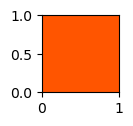

In [85]:
plt.figure(figsize=(1,1))
plt.subplot(111).add_patch(Rectangle((0, 0), 1, 1, color=(1,1/3,0)));

In [86]:
# we save it for later comparison
version_1 = X.copy()
X['E'] = df['E']
X.loc[X.index == 4, 'E'] = 'red'
X.drop(columns=['E_r', 'E_g', 'E_b'], inplace=True)
X['D'] = X['D_male'].apply(lambda x: 'male' if x==1 else 'female')
X = X.drop(columns=['D_male'])
version_1 = X.copy()
X

A    B           C       E       D
0   6.0  1.0   32.000000     red    male
1  11.0 -3.0   63.000000    blue  female
2  16.0  1.0  123.324324     red    male
3  21.0 -3.0  249.000000   green  female
4  26.0  1.0  497.000000     red    male
5  31.0  1.0  993.000000  yellow    male

Does the number of neighbors affect the color selected for this particular missing color?

In [87]:
def best_color_for(neighbors):
    scaler = MinMaxScaler()
    X = pd.concat([df.drop(columns=['D', 'E']), cat_dummies], axis=1)
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    imputer = KNNImputer(n_neighbors=neighbors)
    X = pd.DataFrame(imputer.fit_transform(X),columns = X.columns)
    c = tuple(X.loc[X.index == 4, ['E_r', 'E_g', 'E_b']].head(1).values.flatten())
    print(f'Neighbors: {neighbors} Imputed color: {c}')
    plt.figure(figsize=(1,1))
    plt.subplot(111).add_patch(Rectangle((0, 0), 1, 1, color=c))
    plt.show()

Neighbors: 1 Imputed color: (1.0, 1.0, 0.0)


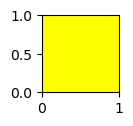

Neighbors: 2 Imputed color: (1.0, 0.5, 0.0)


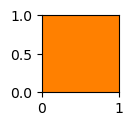

Neighbors: 3 Imputed color: (1.0, 0.3333333333333333, 0.0)


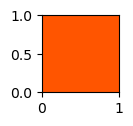

Neighbors: 4 Imputed color: (0.75, 0.5, 0.0)


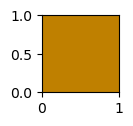

Neighbors: 5 Imputed color: (0.6, 0.4, 0.2)


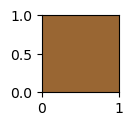

In [88]:
for neighbors in range(1, 6):
    best_color_for(neighbors)

You can see that depending on the number of neighbors selected the imputed color changes, but everything is around red tone.

###  What about using KNN to fill everything from the start?

We have used this algorithm to fill just the last missing color data. And it worked great. And it will work great in many situations. You will find many examples in internet using it as the default tool to go. But it is good to question it. 

In [89]:
df = get_data()
# one hot encode D
D_dummies = pd.get_dummies(df[['D']], drop_first=True)
# one hot encode color in a better way
df['E_r'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=0))
df['E_g'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=1))
df['E_b'] = df['E'].apply(lambda x: rgb_part(x, rgb_index=2))
# we drop categorical variables and we add one hot encoded one
X = pd.concat([df.drop(columns=['D', 'E']), D_dummies], axis=1)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
imputer = KNNImputer(n_neighbors=3)
X = pd.DataFrame(imputer.fit_transform(X), columns = X.columns)
X = pd.DataFrame(scaler.inverse_transform(X), columns = X.columns)
X['D'] = X['D_male'].apply(lambda x: 'male' if x==1 else 'female')
X = X.drop(columns=['D_male'])
X

A         B          C       E_r       E_g       E_b       D
0  1.0  1.000000   1.000000  1.000000  0.000000  0.000000    male
1  2.0 -1.000000   2.000000  0.000000  0.000000  1.000000  female
2  3.0  1.000000  16.333333  1.000000  0.000000  0.000000    male
3  3.0 -1.000000   8.000000  0.000000  1.000000  0.000000  female
4  2.0  1.000000  16.000000  0.333333  0.333333  0.333333  female
5  6.0  0.333333  32.000000  1.000000  1.000000  0.000000    male

The color filled at index 4th is #555555 (darkgray)

In [90]:
X['E'] = df['E']
X.loc[X.index == 4, 'E'] = 'gray'
X.drop(columns=['E_r', 'E_g', 'E_b'], inplace=True)
version_2 = X.copy()
version_2.style.apply(highlight_nans, axis=0)

So, we can see in the above table the results of using brute force for imputation even with a great algorithm like KNN.

- Column A breaks the pattern
- Column B breaks the variable domain (-1, 1)
- Column C breaks the pattern
- Column D loses relation with column B
- Column E loses the red pattern for most colors and even with relation to columns D and B.

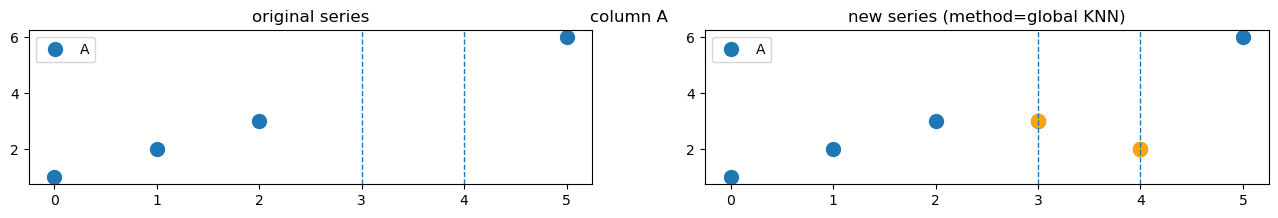

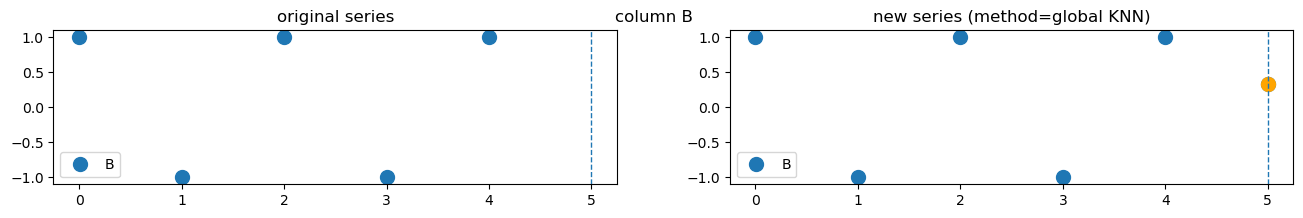

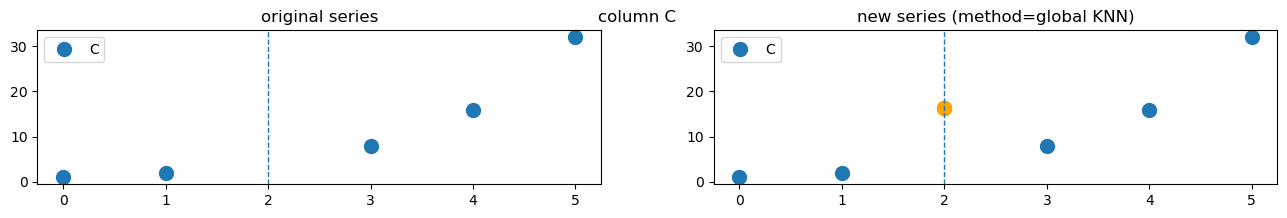

In [91]:
plot_compare(version_2, 'A', 'method=global KNN')
plot_compare(version_2, 'B', 'method=global KNN')
plot_compare(version_2, 'C', 'method=global KNN')

And we can compare these results with the table below that comes from the step by step imputation using different methods.

In [92]:
version_1.style.apply(highlight_nans, axis=0)

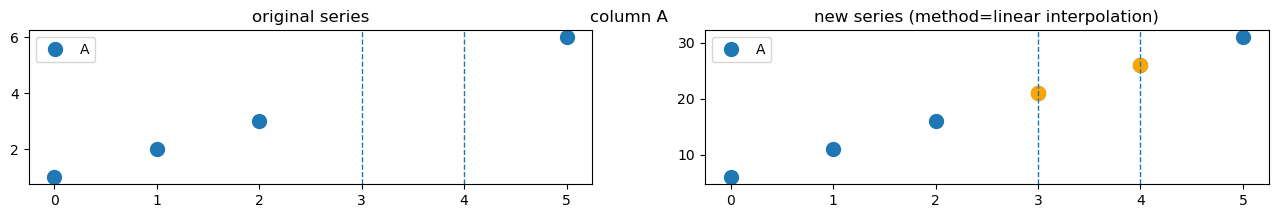

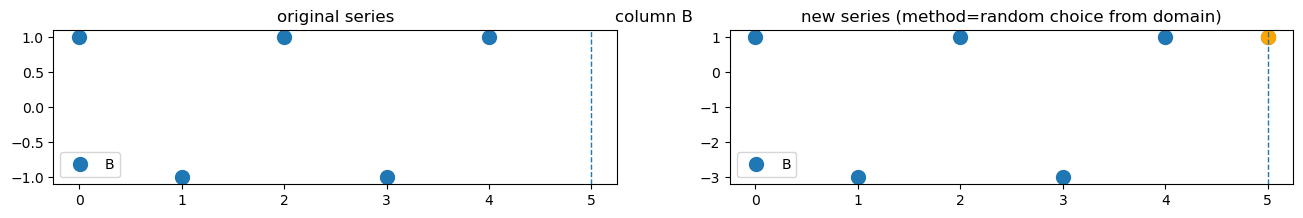

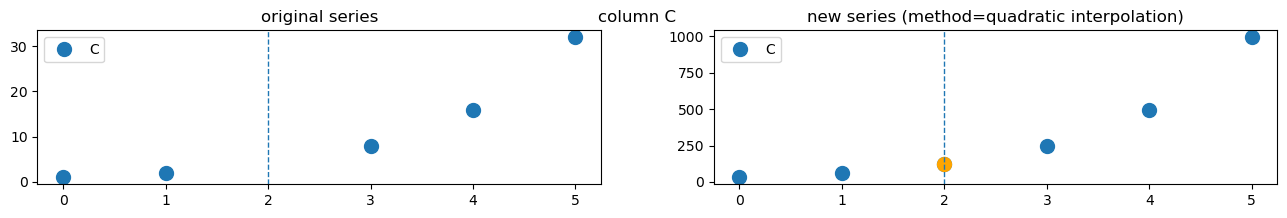

In [93]:
plot_compare(version_1, 'A', 'method=linear interpolation')
plot_compare(version_1, 'B', 'method=random choice from domain')
plot_compare(version_1, 'C', 'method=quadratic interpolation')